In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [8]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["royalblue", "tomato", "tomato","gold"][::-1])

# Windows

- Run the snakemakepipeline in the scripts folder of this project. 
- You need gfastats windows command to get the output

## We start with an example (chromosome 1)

In [9]:
# File name for testing
f = "../results/window/chr1.gfastats.window.txt"
f_path = "/".join(f.split("/")[:-1])

In [10]:
print(f_path)

../results/window


In [11]:
# Read the data frame from gfastats
df = pd.read_csv(f, sep = "\t", header = None)

In [12]:
# First row is index and check with head()
df.set_index(0, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,93,94,95,96,97,98,99,100,101,102
0,,,,,,,,,,,,,,,,,,,,,
10002_Chr1,27.249457,26.307023,27.599160,27.196400,27.411120,27.223913,27.429690,26.958800,27.243610,27.362507,...,27.036117,26.695610,26.886507,27.280393,27.496320,27.299893,27.140712,NaN,NaN,NaN
10015_Chr1,27.137747,26.517487,27.329313,27.228303,26.837750,26.651203,27.235833,26.946097,27.594630,26.981350,...,26.740203,26.754460,26.952567,26.480693,27.143677,27.120237,26.802542,NaN,NaN,NaN
10024_Chr1,26.719497,26.608583,27.151113,27.121090,26.670470,26.796843,27.298297,27.093530,26.967510,27.206680,...,26.876357,26.636363,27.330197,27.498423,26.631482,NaN,NaN,NaN,NaN,NaN
1741_Chr1,27.480437,27.029900,27.342460,27.354700,27.463193,27.278980,27.574520,27.106430,27.414873,27.392517,...,26.587323,26.538700,27.494287,27.110480,27.056423,27.299437,27.479373,27.462887,27.320715,NaN
22001_Chr1_mod2,26.932227,26.792003,26.630870,27.243867,27.253320,26.980420,27.029077,26.807780,27.251363,27.334060,...,27.053133,26.235397,27.239550,25.227390,27.072843,27.314717,25.974580,NaN,NaN,NaN


In [13]:
# Write file for Anna
df22 = df.fillna("NaN")
df22.to_csv("chr1.tsv", sep = "\t")


In [14]:
len(df.columns)

102

Check for nice looking

In [15]:
bins_where = [0,10,20]
bins_what = ["dsada", "dasda", "dasdas"]
size = "300kb"

Text(-21.527777777777786, 0.5, 'Accession')

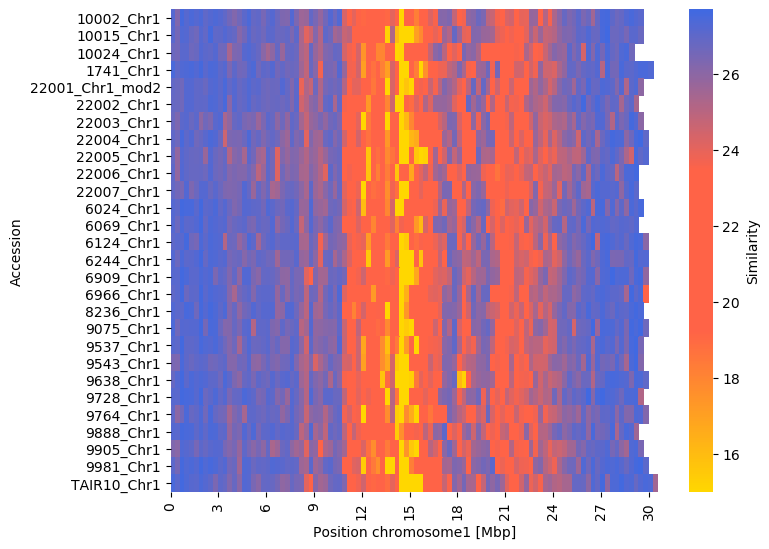

In [16]:
# Plot it as an example

bins_where = [x for x in range(len(df.columns)) if x%10 == 0]
bins_what = [i*3 for i, x in enumerate(range(len(bins_where)))]
plt.figure(figsize=(10, 6))  # Set the figure size
ax = sns.heatmap(df, vmin = 15, cmap = cmap, cbar_kws={'label': 'Similarity'}, xticklabels = bins_what)
plt.tight_layout(rect=[0.05, 0.05, 0.85, 0.95])  # Adjust as needed
ax.set_xticks(bins_where)
plt.xlabel("Position chromosome1" + " [Mbp]")
plt.ylabel("Accession")

# Now run all chromosomes
- Create plots
    - Adjust ticks
    - Maybe remove "ChrX" suffix
- Safe data for Anna

1
2
3
4
5


<Figure size 1000x600 with 0 Axes>

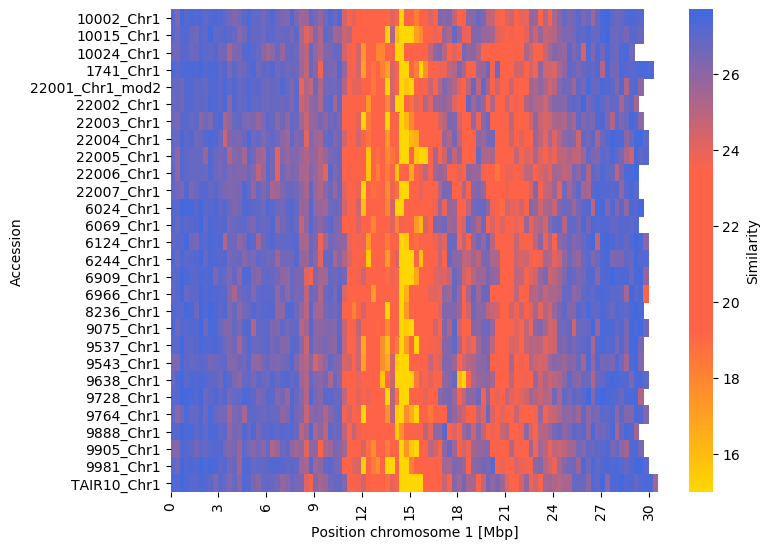

<Figure size 1000x600 with 0 Axes>

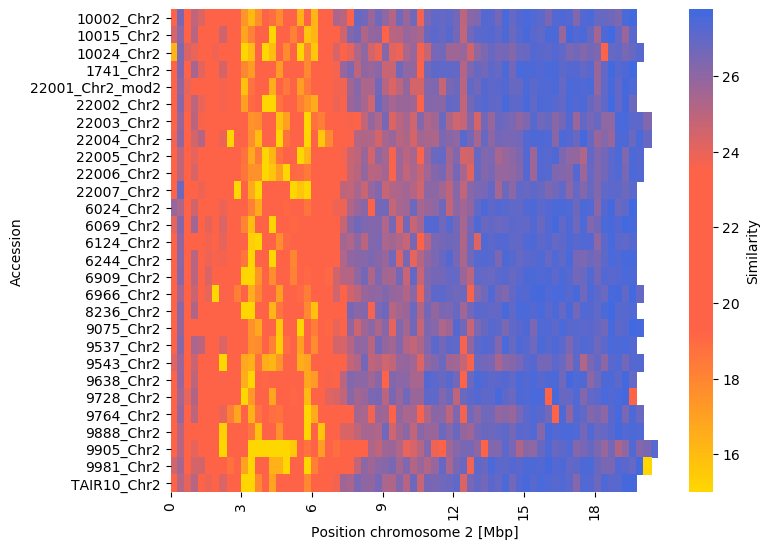

<Figure size 1000x600 with 0 Axes>

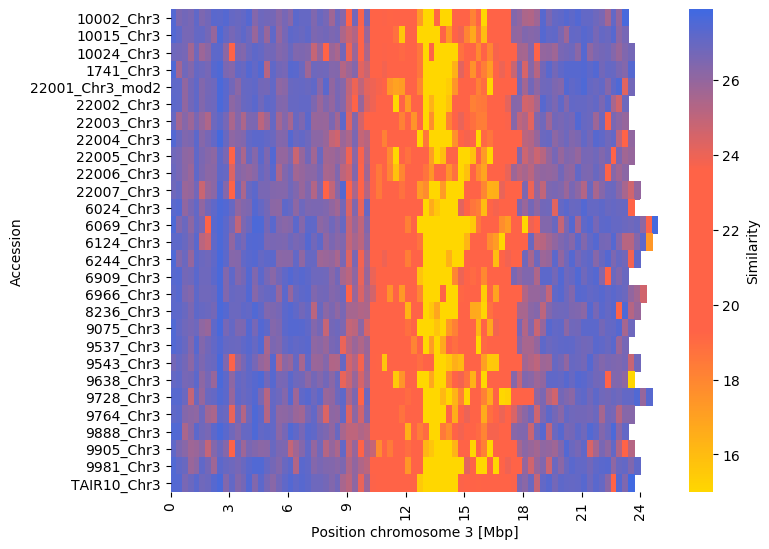

<Figure size 1000x600 with 0 Axes>

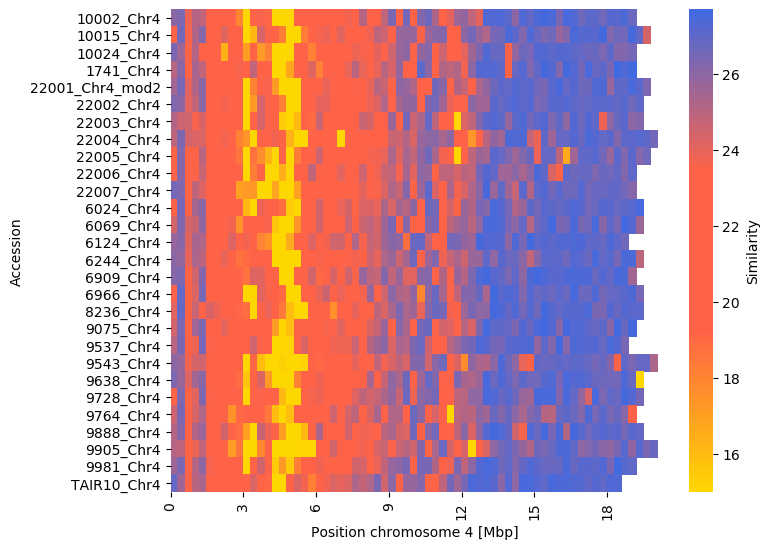

<Figure size 1000x600 with 0 Axes>

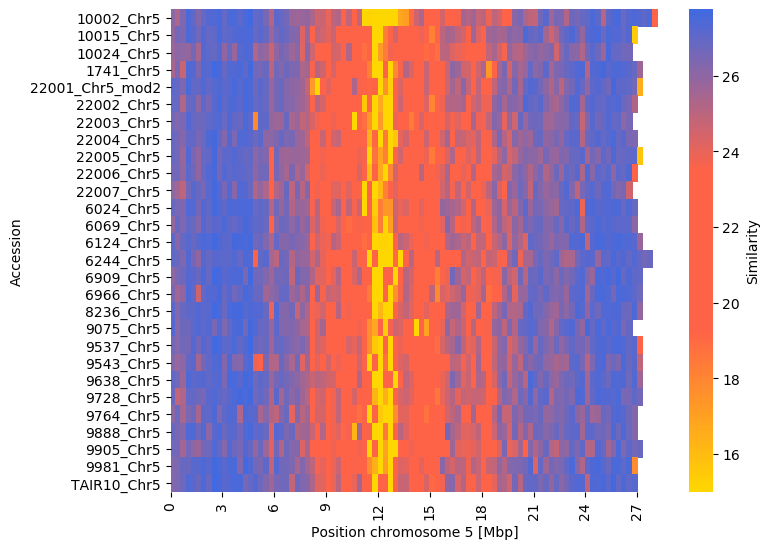

In [17]:
chrom = [1,2,3,4,5]
for x in chrom: 
    # Read the data frame from gfastats
    df = pd.read_csv(f_path + "/chr" + str(x) + ".gfastats.window.txt", sep = "\t", header = None)
    
    df22 = df.fillna("NaN")
    output_file = "data_created/windows/chr" + str(x) + "." + size + ".tsv"
    with open(output_file, 'w') as f:
        f.write("# " + "Each value represent the average similarty value in " + str(size) + " bins"+ "\n")
        f.write("# " + "Similarity value: Number of unique accession/paths found in each node"+ "\n")
    df22.to_csv(output_file, mode = "a", sep = "\t", header = False)
    
    
    # First row is index and check with head()
    df.set_index(0, inplace=True)
    bins_where = [x for x in range(len(df.columns)) if x%10 == 0]
    bins_what = [i*3 for i, x in enumerate(range(len(bins_where)))]
    # Plot it as an example
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.figure(figsize=(10, 6))  # Set the figure size
    ax = sns.heatmap(df, vmin = 15, cmap = cmap, cbar_kws={'label': 'Similarity'}, xticklabels = bins_what)
    plt.tight_layout(rect=[0.05, 0.05, 0.85, 0.95])  # Adjust as needed
    ax.set_xticks(bins_where)
    plt.xlabel("Position chromosome " + str(x) + " [Mbp]")
    plt.ylabel("Accession")
    plt.savefig("plots/sbins_window_chr"+ str(x) + ".1000.png", format = "png", dpi = 1000)
    plt.savefig("plots/sbins_window_chr"+ str(x) + ".300.png", format = "png", dpi = 300)

    plt.savefig("plots/sbins_window_chr"+ str(x) + ".svg", format = "svg", dpi = 1000)
    print(x)